# Explore here

In [1]:
# Your code here
import pandas as pd

#URL of the Dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

#Download and load the dataset into a Dataframe
total_data = pd.read_csv(url)
print(total_data.head(), "\n")

# Save the DataFrame to a local CSV file in the '../data/raw/' directory
total_data.to_csv('../data/raw/diabetes.csv', index=False)
print(f'File saved at: ../data/raw/diabetes.csv')


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

File saved at: ../data/raw/diabetes.csv


In [2]:
# Obtener las dimensiones
total_data.shape

(768, 9)

El Data frame tiene 768 filas y 9 columnas

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Existen un total de 768 filas (en este caso, personas) y 9 columnas, de entre las que encontramos el objetivo o clase a predecir, Outcome.
Todas las variables tienen 768 instancias con valores.
Los datos cuentan con 9 características numéricas.

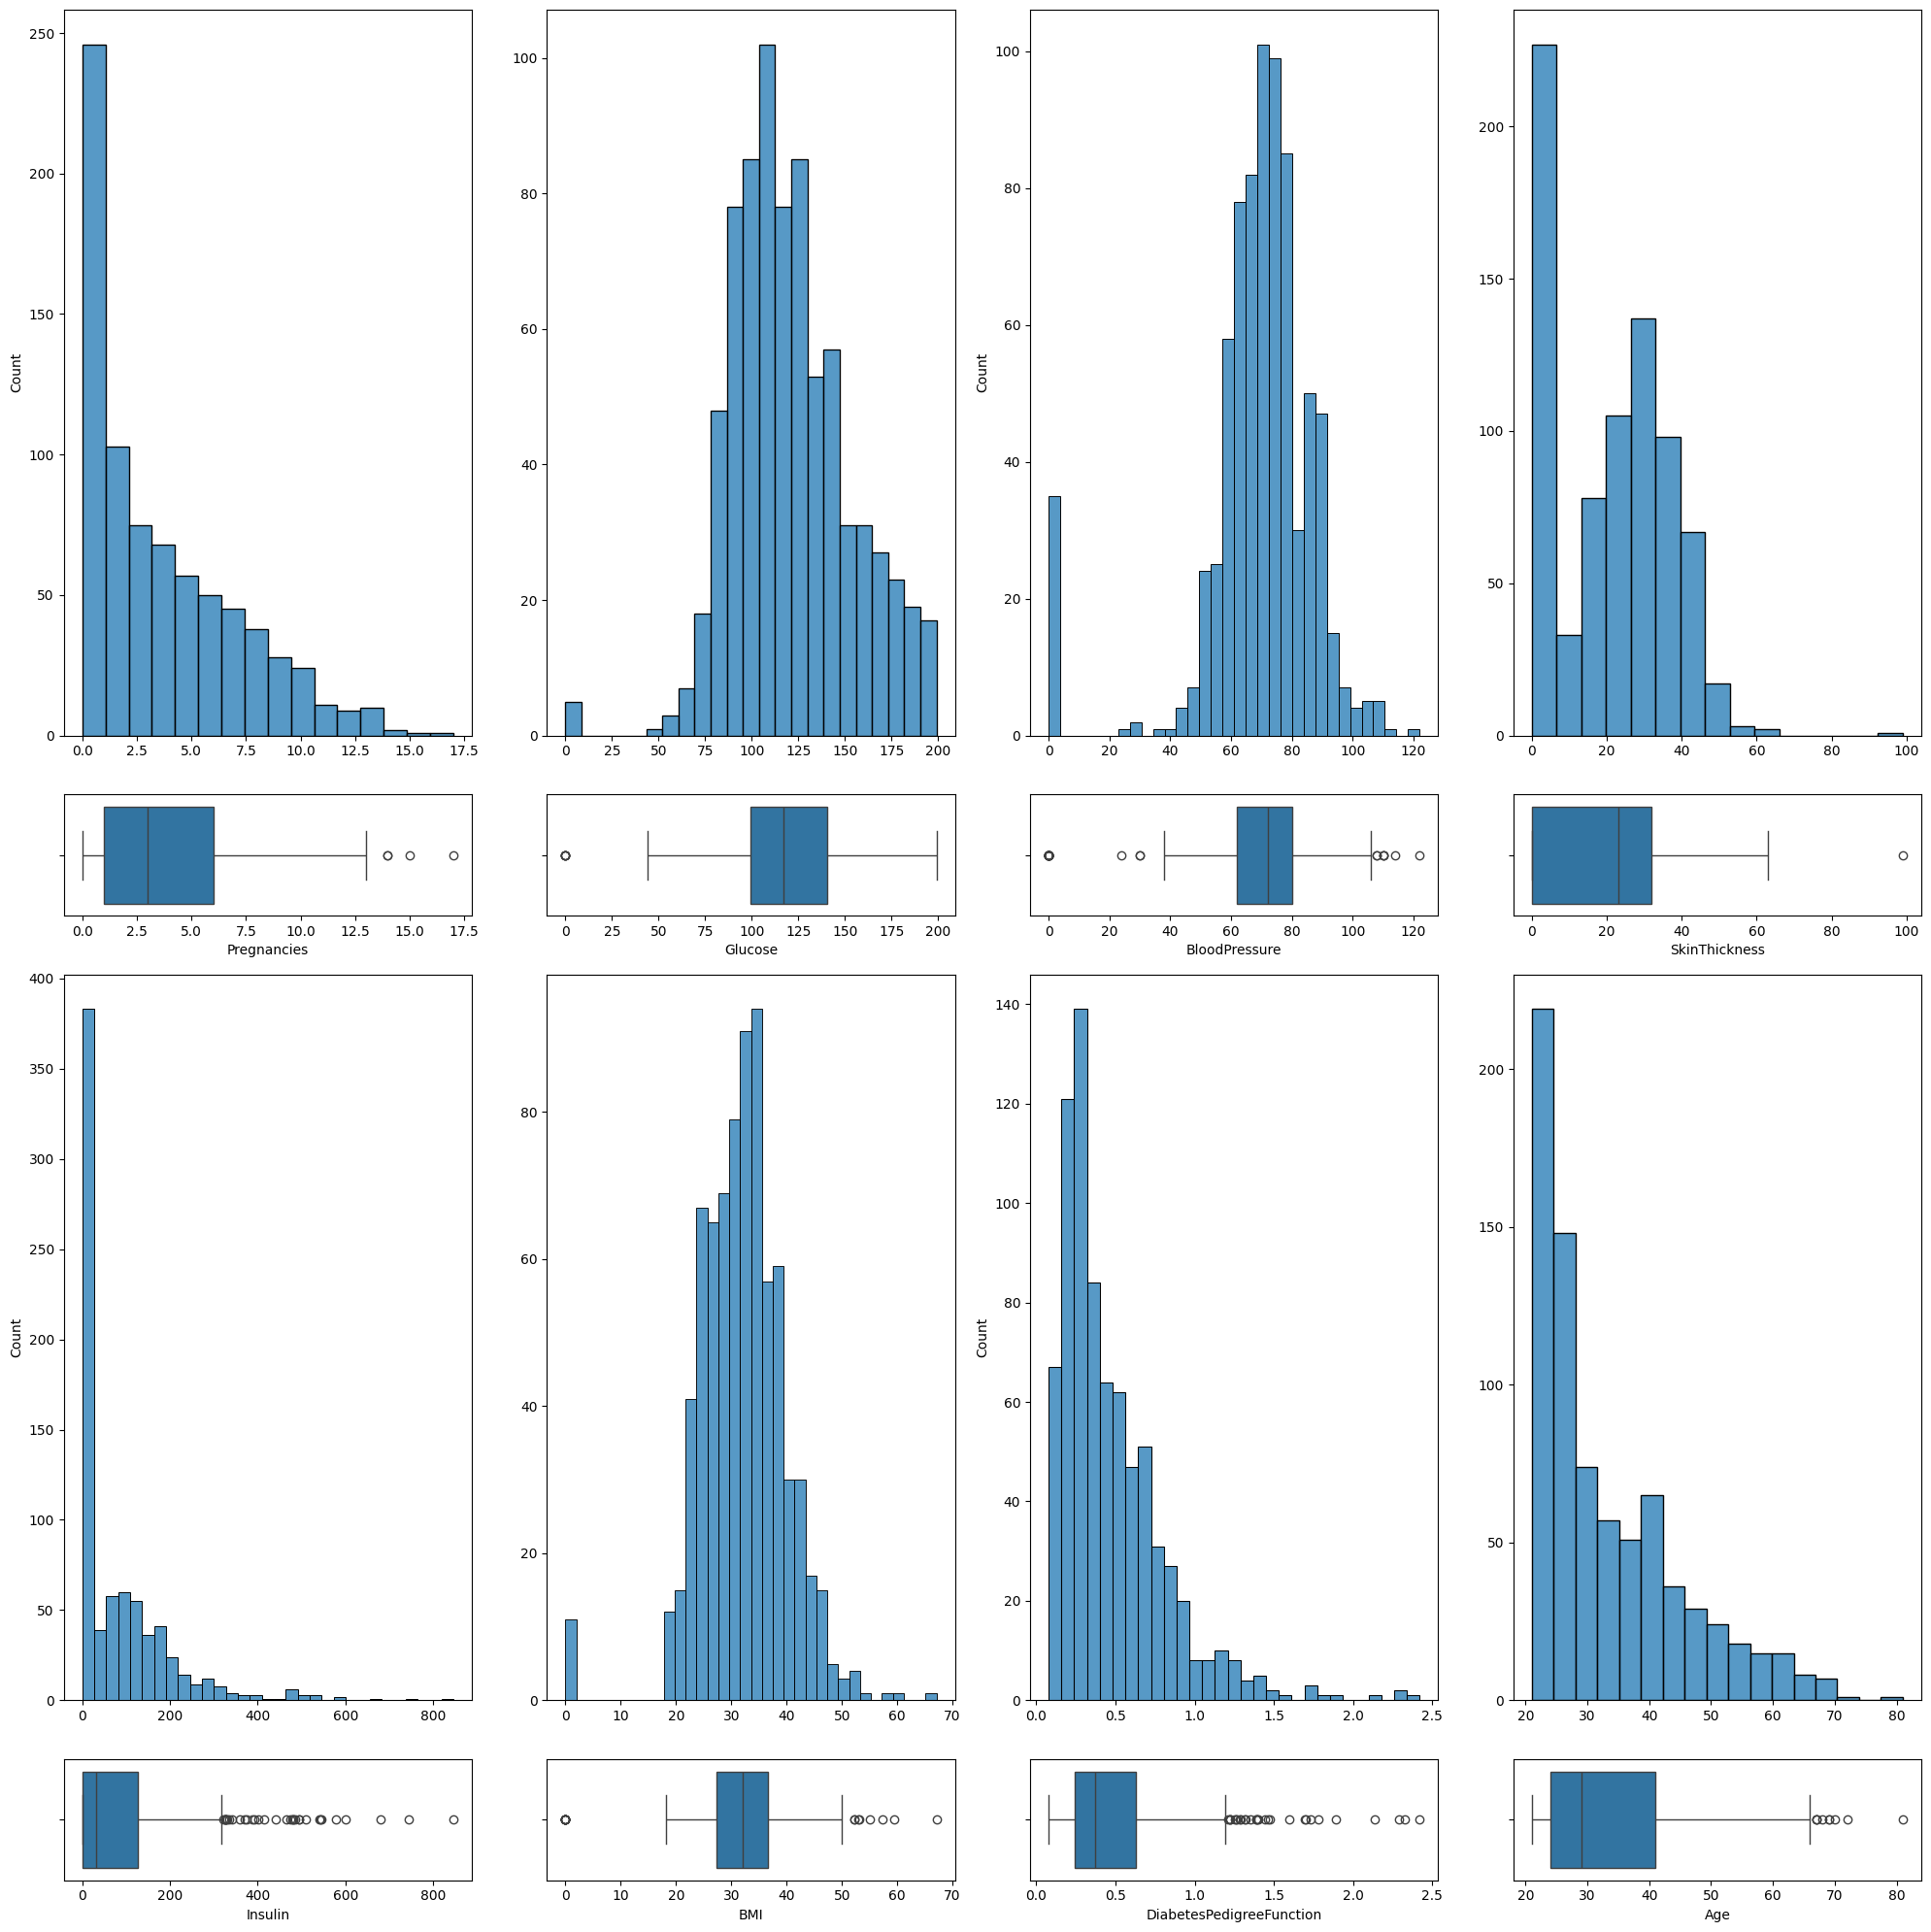

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Crear una figura múltiple con histogramas y diagramas de caja
fig, axis = plt.subplots(4, 4, figsize=(20, 20), gridspec_kw={'height_ratios': [6, 1, 6, 1] })

# Ajustar cada subplot a su posición adecuada
sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=total_data, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=total_data, x="Glucose").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")
sns.histplot(ax=axis[0, 2], data=total_data, x="BloodPressure").set(xlabel=None)
sns.boxplot(ax=axis[1, 2], data=total_data, x="BloodPressure")
sns.histplot(ax=axis[0, 3], data=total_data, x="SkinThickness").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 3], data=total_data, x="SkinThickness")
sns.histplot(ax=axis[2, 0], data=total_data, x="Insulin").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=total_data, x="Insulin")
sns.histplot(ax=axis[2, 1], data=total_data, x="BMI").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=total_data, x="BMI")
sns.histplot(ax=axis[2, 2], data=total_data, x="DiabetesPedigreeFunction").set(xlabel=None)
sns.boxplot(ax=axis[3, 2], data=total_data, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[2, 3], data=total_data, x="Age").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 3], data=total_data, x="Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


De la visualización resultante podemos ver que todas las variables tienen valores atípicos, siendo las más destacables DiabetesPedigreeFunction e Insulin cuyos valores atípicos están lejos de la distribución estándar.

La distribuccion de valores de las variables Glucose, blood presure y BMI se parecen mucho a una campana, lo que indica que la mayor parte de los datos estan alrededor de la media, con menos datos en los extremos.

La distribucción de valores de las variables Diabetes pedigree Function, Age, Insulin y Pregnanci, tiene una distribución asimétrica, con una forma que parece una campana cortada y sesgada hacia la derecha. Esto significa que, la cola larga de la distribución se extiende hacia el lado derecho y la mayor concentración de datos está en el lado izquierdo


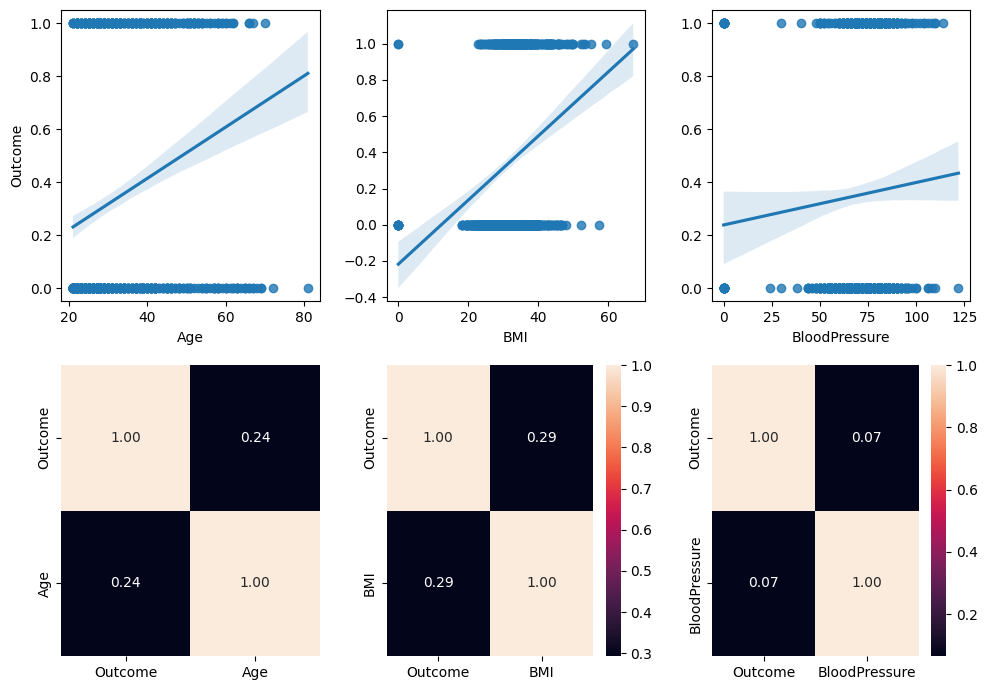

In [5]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "Age", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "BMI", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data, x = "BloodPressure", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Existe una relación directa (aunque no muy fuerte) entre la edad de las personas y el indice de 
masa corporal con tener diabetes (Outcome)). 
Así, algunos las personas con mayor edad y mayor BMI tienen mayor probabilidad de desarrollar diabetes.

El mapa de calor respecto al BMI indica que, Significa que a medida que aumenta el BMI, hay una tendencia un poco más fuerte, pero aún moderada, a que aumente la probabilidad de desarrollar diabetes. Respecto  a la edad, hay una correlación positiva baja. Significa que a medida que aumenta la edad, hay una ligera tendencia a que también aumente la probabilidad de desarrollar diabetes, pero esta relación no es fuerte.
En cambio la BloodPressure también existe una relación lineal positiva, más débil que la anterior, entre la presion sanguinea (BloodPressure) y la variable objetivo.

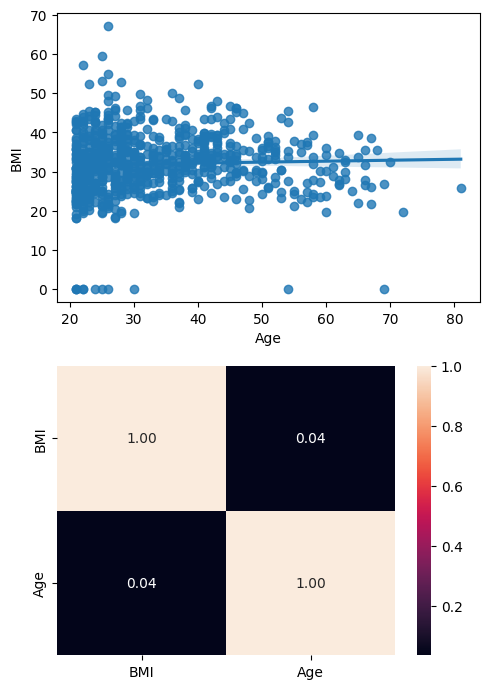

In [6]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "BMI")
sns.heatmap(total_data[["BMI", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se puede determinar que no existe una relación muy fuerte entre ambas variables y que la edad no impacta sobre que el indice de masa corporal sea mayor o no.

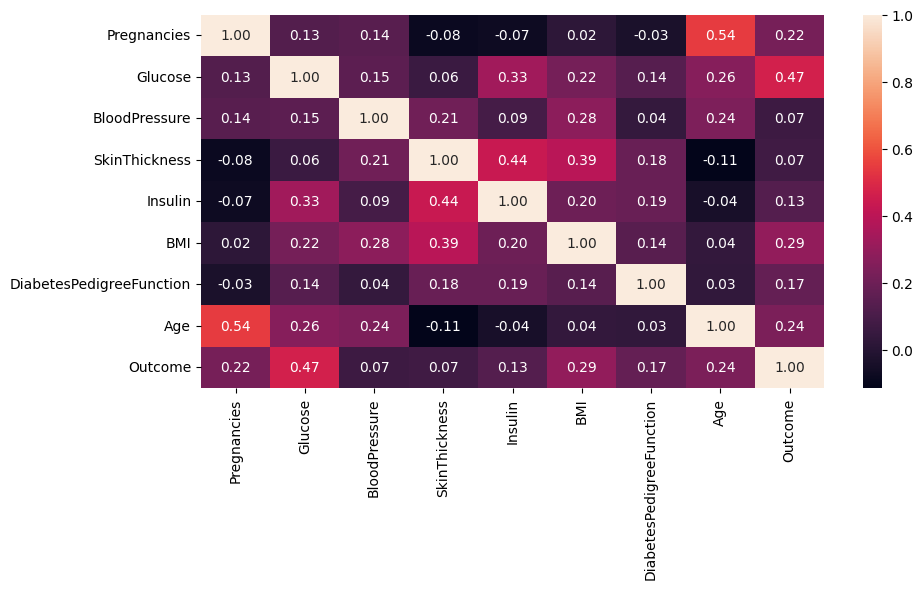

In [7]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis de correlaciones refleja una fuerte relación directa entre la variable Pregnancies y la edad, entre la glucosa y la diabetes, y entre la insulina sérica y el grosor del pliege cutáneo. El resto de las correlaciones son débiles y no son tan significativas como para contemplarlas en el análisis.

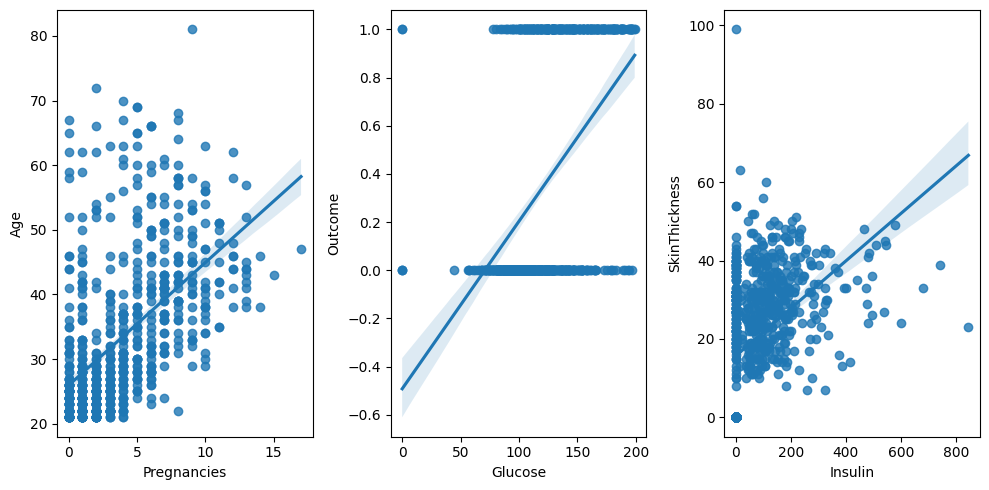

In [8]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = total_data, x = "Pregnancies", y = "Age")
sns.regplot(ax = axis[1], data = total_data, x = "Glucose", y = "Outcome")
sns.regplot(ax = axis[2], data = total_data, x = "Insulin", y = "SkinThickness")

plt.tight_layout()

plt.show()

Se observa que a medida que aumenta la edad los embarazos tambien.
A medida que hay mas glucosa existe mas diabetes.
A medida que el espesor de la piel mas insulina hay.

In [9]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Insulin muestra una gran discrepancia entre la media y la mediana, así como una enorme diferencia entre el percentil 75% y el valor máximo, indicando valores atípicos extremos en el conjunto de datos.

BMI tiene una distribución más simétrica en torno a la media

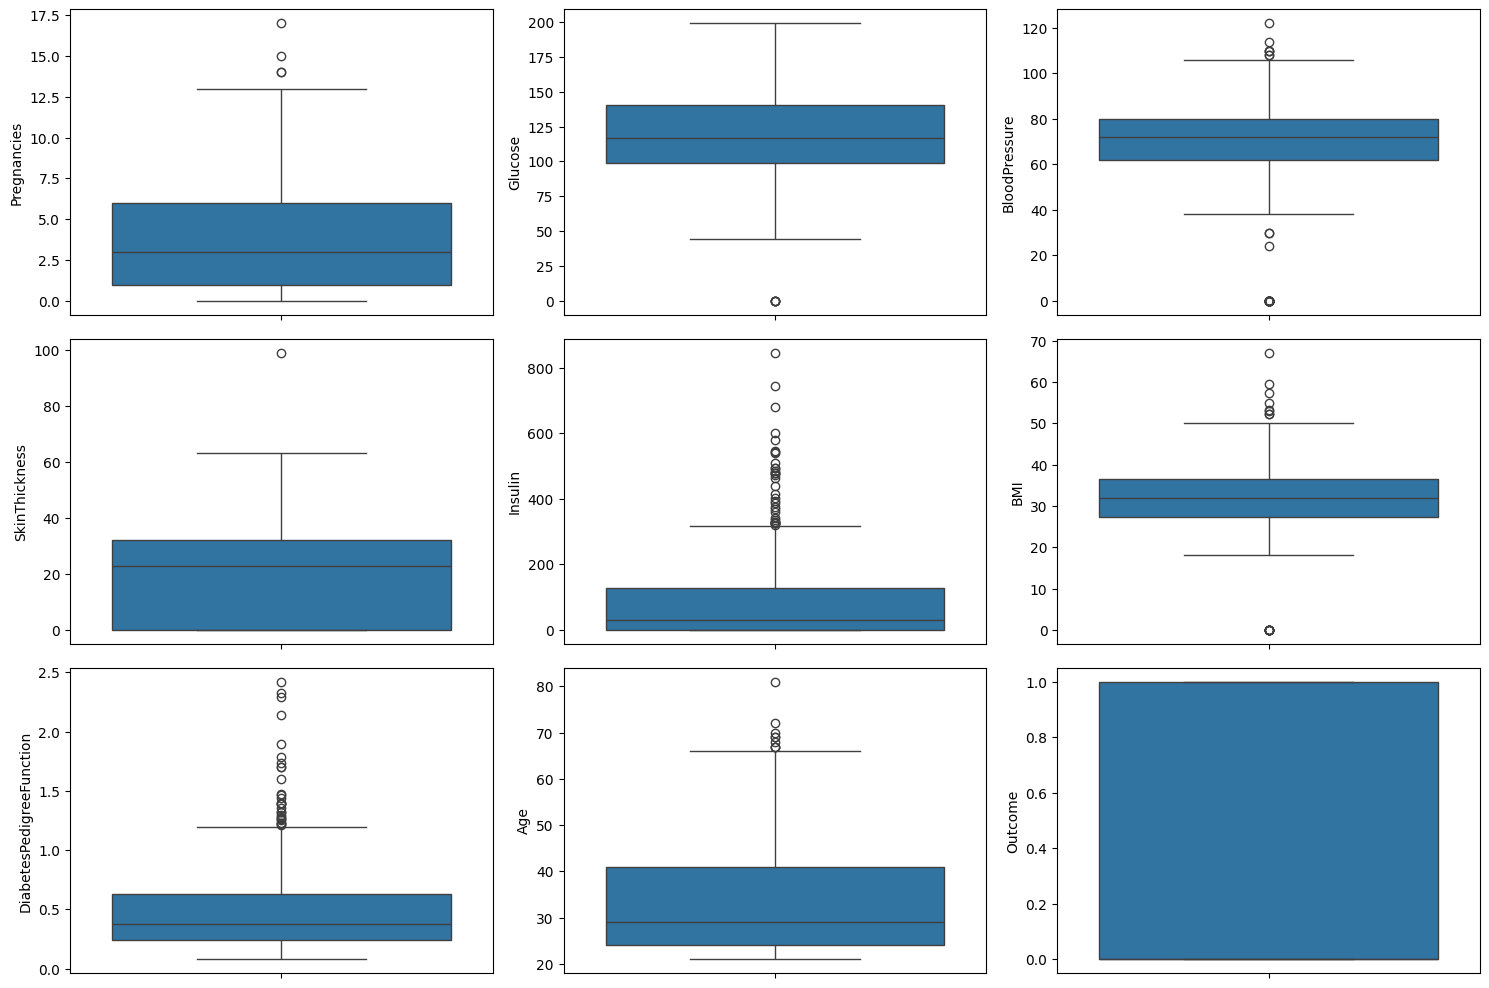

In [10]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "BMI")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Age")
sns.boxplot(ax = axis[2, 2], data = total_data, y = "Outcome")

plt.tight_layout()

plt.show()

In [11]:
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


<Axes: >

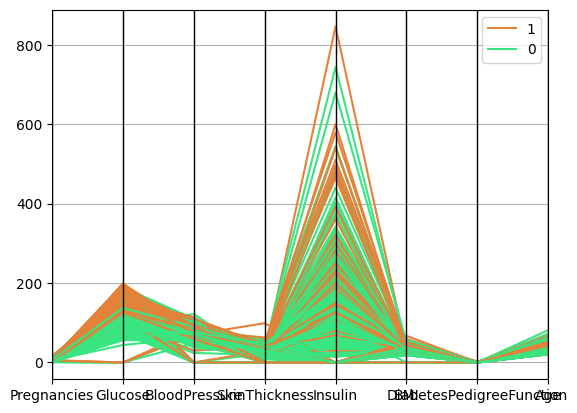

In [14]:
import pandas as pd

total_data = X
total_data["Name"] = y

pd.plotting.parallel_coordinates(total_data, "Name", color = ("#E58139", "#39E581", "#8139E5"))

In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [17]:
from sklearn.metrics import accuracy_score

acuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo inicial: {acuracy:.2f}")


Precisión del modelo inicial: 0.71


Un accuracy (precisión) de 0.71 significa que el modelo de boosting algorithms clasifica correctamente el 71% de las instancias en el conjunto de prueba (X_test). En otras palabras, de todas las predicciones que hace el modelo, el 71% son correctas.

Una vez se tiene la precisión del modelo inicial, se procederá a ajustar los hiperparámetros y se evaluará su impacto en la precisión.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
hyperparams = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=7,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [30]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [31]:
model_random_search = XGBClassifier(n_estimators= 50, max_depth = 3, learning_rate = 0.1)
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con la nueva hiperparametrización:{random_search_accuracy:.2f}")

Precisión del modelo con la nueva hiperparametrización:0.75


Una precisión de 0.75 significa que el modelo predice correctamente el 75% de las instancias en el conjunto de prueba.

Comparado con la precisión inicial de 0.71, hay una mejora de 0.04. Aunque parece pequeña, cualquier aumento en la precisión puede ser valioso, especialmente en tareas críticas como la predicción de enfermedades.

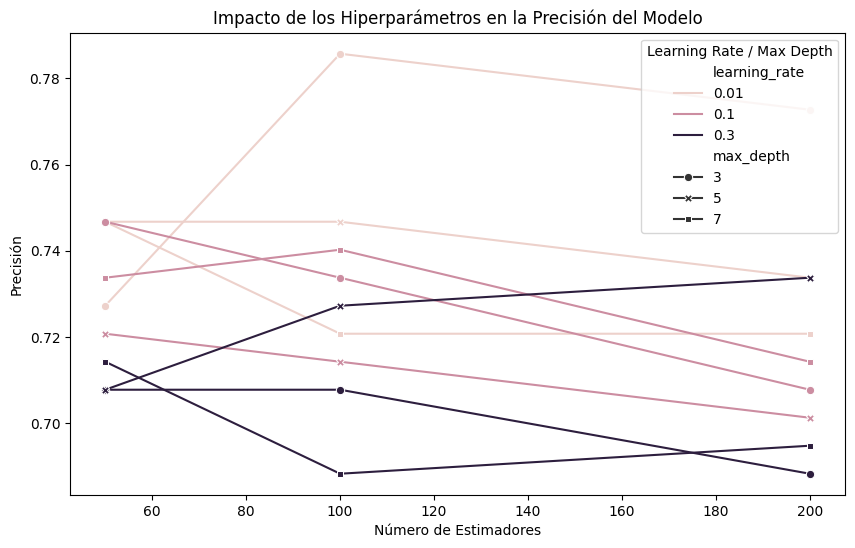

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_resultados, x='n_estimators', y='accuracy', hue='learning_rate', style='max_depth', markers=True, dashes=False)
plt.title('Impacto de los Hiperparámetros en la Precisión del Modelo')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión')
plt.legend(title='Learning Rate / Max Depth')
plt.show()
